In [82]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('bmh')
%matplotlib inline

In [83]:
# To learn more about the data set https://archive.ics.uci.edu/ml/datasets/pima+indians+diabetes

data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data'
df = pd.read_csv(data_url)

In [84]:
df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


#### Column names

1. Number of times pregnant
2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-Hour serum insulin (mu U/ml)
6. Body mass index (weight in kg/(height in m)^2)
7. Diabetes pedigree function
8. Age (years)
9. Class variable (0 or 1)

In [85]:
columns = ["#pregnancies", "glucose_conc", "blood_pressure", 
           "skin_thickness", "serum_insulin", "bmi", "dpf", "age", "class"]

df.columns = columns

In [86]:
df.head()

,#pregnancies,glucose_conc,blood_pressure,skin_thickness,serum_insulin,bmi,dpf,age,class
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [87]:
df.shape

(767, 9)

In [88]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [89]:
# Split data into a training and testing datasets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [91]:
# Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
print("Accuracy of training score is", train_score)
print("Accuracy of testing score is", test_score )

Accuracy of training score is 0.764925373134
Accuracy of testing score is 0.792207792208


In [92]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print("Accuracy of training score is", rf_train_score)
print("Accuracy of testing score is", rf_test_score)

Accuracy of training score is 0.981343283582
Accuracy of testing score is 0.74025974026


In [93]:
# Naive Bayse Classifier

nb = MultinomialNB()
nb.fit(X_train, y_train)
nb_train_score = nb.score(X_train, y_train)
nb_test_score = nb.score(X_test, y_test)
print("Accuracy of training score is", nb_train_score)
print("Accuracy of testing score is", nb_test_score)

Accuracy of training score is 0.589552238806
Accuracy of testing score is 0.584415584416


In [94]:
# Support Vector Machines

svm = SVC()
svm.fit(X_train, y_train)
svm_train_score = svm.score(X_train, y_train)
svm_test_score = svm.score(X_test, y_test)
print("Accuracy of training score is", svm_train_score)
print("Accuracy of testing score is", svm_test_score)

Accuracy of training score is 1.0
Accuracy of testing score is 0.65367965368


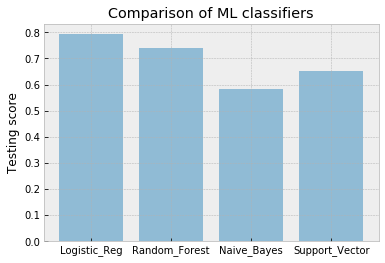

In [95]:
# Plotting the results

classifiers = ["Logistic_Reg", "Random_Forest", "Naive_Bayes", "Support_Vector"]
y_axis = range(len(classifiers))
scores = [lr_test_score, rf_test_score, nb_test_score, svm_test_score]

plt.bar(y_axis, scores, align='center', alpha=0.5)
plt.xticks(y_axis, classifiers)
plt.ylabel('Testing score')
plt.title('Comparison of ML classifiers')

#### Tuning hyperparameters with GridSearch

In [96]:
from sklearn.grid_search import GridSearchCV

In [103]:
grid_values = {
    'n_estimators': (5, 10, 20, 50),
    'max_depth': (50, 150, 250),
    'min_samples_split': [2, 3],
    'min_samples_leaf': (1, 2, 3)
}
grid_search = GridSearchCV(rf, param_grid=grid_values, verbose=1, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed:    4.8s finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': (5, 10, 20, 50), 'max_depth': (50, 150, 250), 'min_samples_split': [2, 3], 'min_samples_leaf': (1, 2, 3)},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [104]:
print ('Best score: %0.3f' % grid_search.best_score_)
print ('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()
for param_name in sorted(grid_values.keys()):
    print ('\t%s: %r' % (param_name, best_parameters[param_name]))

Best score: 0.784
Best parameters set:
	max_depth: 50
	min_samples_leaf: 2
	min_samples_split: 2
	n_estimators: 20
